In [49]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [24]:
df.shape

(50000, 3)

In [10]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

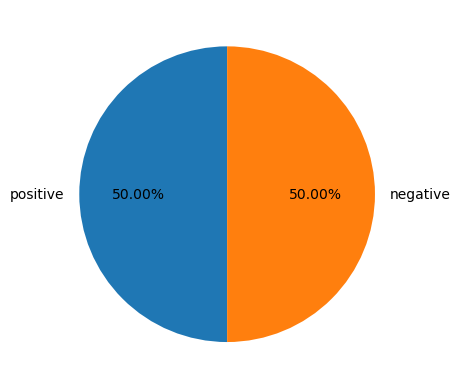

In [17]:
plt.pie(df['sentiment'].value_counts(),autopct='%0.2f%%',startangle=90,labels=df['sentiment'].value_counts().index)
plt.show()

In [18]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

In [19]:
df['clean_review'] = df['review'].apply(clean_text)
print("Cleaned Data:")
print(df[['review', 'clean_review']].head())

Cleaned Data:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [23]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)  
X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [33]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.86
Precision: 0.84
Recall: 0.88


In [35]:
param_grid_lr = {  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'] 
}

In [36]:
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, scoring='accuracy')
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [37]:
best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_lr.best_params_)

Best Logistic Regression Parameters: {'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
param_grid_nb = {
    'alpha': [0.1, 1, 10] 
}
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3, scoring='accuracy')
grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_
print("Best Naive Bayes Parameters:", grid_nb.best_params_)

Best Naive Bayes Parameters: {'alpha': 0.1}


In [46]:
param_grid_svm = {
    'C': [0.1, 1],  
    'kernel': ['linear', 'rbf'] 
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=2, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}


In [42]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

In [43]:
lr_accuracy, lr_precision, lr_recall = evaluate_model(best_lr, X_test, y_test)
print("\nLogistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.2f}, Precision: {lr_precision:.2f}, Recall: {lr_recall:.2f}")


Logistic Regression Performance:
Accuracy: 0.86, Precision: 0.84, Recall: 0.88


In [44]:
nb_accuracy, nb_precision, nb_recall = evaluate_model(best_nb, X_test, y_test)
print("\nNaive Bayes Performance:")
print(f"Accuracy: {nb_accuracy:.2f}, Precision: {nb_precision:.2f}, Recall: {nb_recall:.2f}")


Naive Bayes Performance:
Accuracy: 0.84, Precision: 0.82, Recall: 0.86


In [47]:
svm_accuracy, svm_precision, svm_recall = evaluate_model(best_svm, X_test, y_test)
print("\nSVM Performance:")
print(f"Accuracy: {svm_accuracy:.2f}, Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}")


SVM Performance:
Accuracy: 0.86, Precision: 0.84, Recall: 0.88


In [48]:
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy': [lr_accuracy, nb_accuracy, svm_accuracy],
    'Precision': [lr_precision, nb_precision, svm_precision],
    'Recall': [lr_recall, nb_recall, svm_recall]
}

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression   0.85825   0.837997  0.878086
1          Naive Bayes   0.83875   0.819165  0.857510
2                  SVM   0.85750   0.836435  0.878601
